In [1]:
import numpy as np
import pandas as pd #data processing
import math #mathematical functions

import seaborn as sns
import matplotlib.pyplot as plt

from statistics import mode #just for mode
from scipy.special import binom #binomial distribution
from scipy.stats import iqr #only for interquartile range

In [2]:
movie = pd.read_csv("../Data/movie.csv")

In [3]:
movie.head()

,color,director_name,num_critic_for_reviews,duration,gross,genres,movie_title,num_voted_users,plot_keywords,num_user_for_reviews,language,country,content_rating,budget,title_year,imdb_score
0,Black and White,Elia Kazan,94.0,125.0,NaN,Drama,A Streetcar Named DesireÂ,78454,brother in law sister in law relationship|expe...,233.0,English,USA,PG,1800000.0,1951,8.0
1,Black and White,Stanley Kubrick,192.0,95.0,NaN,Comedy,Dr. Strangelove or: How I Learned to Stop Worr...,342585,bomber|doomsday|general|u.s. president|war room,839.0,English,USA,PG,1800000.0,1964,8.5
2,Color,Sergio Leone,164.0,145.0,NaN,Western,Once Upon a Time in the WestÂ,216005,gang|gun|harmonica|killing|woman in bathtub,565.0,English,Italy,PG-13,5000000.0,1968,8.6
3,Color,Edward Dmytryk,10.0,113.0,NaN,Western,ShalakoÂ,1978,bare chested male bondage|european|female fron...,41.0,English,UK,PG,1455000.0,1968,5.5
4,Color,Bernardo Bertolucci,120.0,106.0,NaN,Drama,The ConformistÂ,17813,fascist|gun|italy|nudity|sexuality,101.0,Italian,Italy,R,750000.0,1970,8.1


In [4]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   color                   476 non-null    object 
 1   director_name           478 non-null    object 
 2   num_critic_for_reviews  474 non-null    float64
 3   duration                477 non-null    float64
 4   gross                   396 non-null    float64
 5   genres                  478 non-null    object 
 6   movie_title             478 non-null    object 
 7   num_voted_users         478 non-null    int64  
 8   plot_keywords           453 non-null    object 
 9   num_user_for_reviews    476 non-null    float64
 10  language                477 non-null    object 
 11  country                 478 non-null    object 
 12  content_rating          478 non-null    object 
 13  budget                  413 non-null    float64
 14  title_year              478 non-null    in

In [5]:
movie.describe()

,num_critic_for_reviews,duration,gross,num_voted_users,num_user_for_reviews,budget,title_year,imdb_score
count,474.000000,477.000000,3.960000e+02,4.780000e+02,476.000000,4.130000e+02,478.000000,478.000000
mean,117.270042,102.909853,3.061591e+07,6.356270e+04,234.817227,1.830562e+07,2004.027197,6.215272
std,104.535734,18.365976,4.179396e+07,1.210644e+05,378.792822,4.182677e+07,10.035017,1.303148
min,1.000000,52.000000,2.468000e+03,6.000000e+00,1.000000,1.100000e+03,1951.000000,1.900000
25%,37.250000,90.000000,2.330090e+06,3.470000e+03,36.000000,2.700000e+06,2000.000000,5.400000
50%,86.000000,99.000000,1.401058e+07,1.983500e+04,120.000000,1.000000e+07,2006.000000,6.450000
75%,165.500000,111.000000,4.023190e+07,7.410850e+04,275.500000,2.000000e+07,2011.000000,7.200000
max,548.000000,196.000000,2.773134e+08,1.347461e+06,3400.000000,7.000000e+08,2016.000000,8.800000


In [6]:
movie.genres=movie.genres.astype('category')

In [7]:
movie.country=movie.country.astype('category')

In [8]:
movie.content_rating=movie.content_rating.astype('category')

In [9]:
movie.title_year=movie.title_year.astype('int')

In [10]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   color                   476 non-null    object  
 1   director_name           478 non-null    object  
 2   num_critic_for_reviews  474 non-null    float64 
 3   duration                477 non-null    float64 
 4   gross                   396 non-null    float64 
 5   genres                  478 non-null    category
 6   movie_title             478 non-null    object  
 7   num_voted_users         478 non-null    int64   
 8   plot_keywords           453 non-null    object  
 9   num_user_for_reviews    476 non-null    float64 
 10  language                477 non-null    object  
 11  country                 478 non-null    category
 12  content_rating          478 non-null    category
 13  budget                  413 non-null    float64 
 14  title_year              47

In [11]:
movie.describe()

,num_critic_for_reviews,duration,gross,num_voted_users,num_user_for_reviews,budget,title_year,imdb_score
count,474.000000,477.000000,3.960000e+02,4.780000e+02,476.000000,4.130000e+02,478.000000,478.000000
mean,117.270042,102.909853,3.061591e+07,6.356270e+04,234.817227,1.830562e+07,2004.027197,6.215272
std,104.535734,18.365976,4.179396e+07,1.210644e+05,378.792822,4.182677e+07,10.035017,1.303148
min,1.000000,52.000000,2.468000e+03,6.000000e+00,1.000000,1.100000e+03,1951.000000,1.900000
25%,37.250000,90.000000,2.330090e+06,3.470000e+03,36.000000,2.700000e+06,2000.000000,5.400000
50%,86.000000,99.000000,1.401058e+07,1.983500e+04,120.000000,1.000000e+07,2006.000000,6.450000
75%,165.500000,111.000000,4.023190e+07,7.410850e+04,275.500000,2.000000e+07,2011.000000,7.200000
max,548.000000,196.000000,2.773134e+08,1.347461e+06,3400.000000,7.000000e+08,2016.000000,8.800000


In [12]:
movie.describe(include='category')

,genres,country,content_rating
count,478,478,478
unique,14,22,5
top,Drama,USA,R
freq,186,403,295


# One Categorical Variable

In [13]:
print("The unique categories of genres are:")
movie.genres.unique()

The unique categories of genres are:


['Drama', 'Comedy', 'Western', 'Thriller', 'Horror', ..., 'Musical', 'Animation', 'Fantasy', 'Family', 'Romance']
Length: 14
Categories (14, object): ['Action', 'Adventure', 'Animation', 'Comedy', ..., 'Romance', 'Sci-Fi', 'Thriller', 'Western']

In [14]:
print("The unique categories of country are:")
movie.country.unique()

The unique categories of country are:


['USA', 'Italy', 'UK', 'Sweden', 'Canada', ..., 'Mexico', 'China', 'South Korea', 'Poland', 'Ireland']
Length: 22
Categories (22, object): ['Afghanistan', 'Argentina', 'Australia', 'Brazil', ..., 'Sweden', 'Thailand', 'UK', 'USA']

In [15]:
print("The unique categories of content_rating are:")
movie.content_rating.unique()

The unique categories of content_rating are:


['PG', 'PG-13', 'R', 'NC-17', 'G']
Categories (5, object): ['G', 'NC-17', 'PG', 'PG-13', 'R']

In [16]:
print("The frequency table of genres are:\n")
movie.genres.value_counts()

The frequency table of genres are:



Drama          186
Comedy         182
Horror          53
Documentary     17
Action          10
Thriller        10
Western          8
Adventure        3
Family           3
Animation        2
Fantasy          1
Musical          1
Romance          1
Sci-Fi           1
Name: genres, dtype: int64

In [17]:
print("The frequency table of country are:\n")
movie.country.value_counts()

The frequency table of country are:



USA             403
UK               23
Canada           10
France            9
Italy             4
Spain             4
China             3
Denmark           3
Germany           3
Australia         2
Brazil            2
Mexico            2
South Korea       1
Thailand          1
Sweden            1
Afghanistan       1
South Africa      1
Poland            1
Argentina         1
India             1
Iceland           1
Ireland           1
Name: country, dtype: int64

In [18]:
print("The frequency table of content_rating are:\n")
movie.content_rating.value_counts()

The frequency table of content_rating are:



R        295
PG-13    124
PG        53
G          4
NC-17      2
Name: content_rating, dtype: int64

<Axes: title={'center': 'Bar Chart of Movie Genre'}>

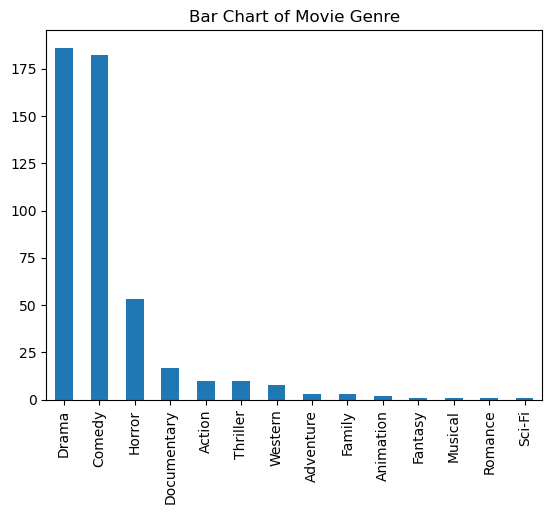

In [19]:
movie.genres.value_counts().plot.bar(title = "Bar Chart of Movie Genre")

<Axes: title={'center': 'Bar Chart of Movies Produced by Country'}>

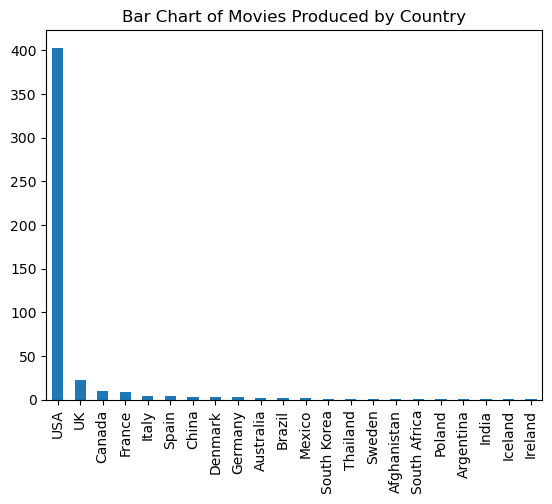

In [20]:
movie.country.value_counts().plot.bar(title = "Bar Chart of Movies Produced by Country")

<Axes: title={'center': 'Bar Chart of Movie Content Rating'}>

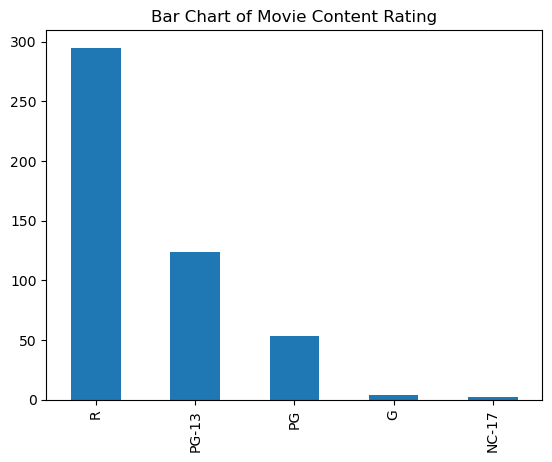

In [21]:
movie.content_rating.value_counts().plot.bar(title = "Bar Chart of Movie Content Rating")

# One Numerical Variable

In [22]:
movie[["gross", "budget", "imdb_score"]].mean()

gross         3.061591e+07
budget        1.830562e+07
imdb_score    6.215272e+00
dtype: float64

In [23]:
movie[["gross", "budget", "imdb_score"]].mean().round(2)

gross         30615905.82
budget        18305620.10
imdb_score           6.22
dtype: float64

In [24]:
movie[["gross", "budget", "imdb_score"]].median().round(2)

gross         14010576.50
budget        10000000.00
imdb_score           6.45
dtype: float64

In [25]:
movie.genres.mode()

0    Drama
Name: genres, dtype: category
Categories (14, object): ['Action', 'Adventure', 'Animation', 'Comedy', ..., 'Romance', 'Sci-Fi', 'Thriller', 'Western']

In [26]:
movie["imdb_score"].mode()

0    6.9
Name: imdb_score, dtype: float64

In [27]:
print(f"""
The minimum is {min(movie.imdb_score)}
The maximum is {max(movie.imdb_score)}
The first quartile is {np.quantile(movie.imdb_score,.25)}
The median is {np.median(movie.imdb_score)}
The third quartile is {np.quantile(movie.imdb_score,.75)}
The range is {max(movie.imdb_score) - min(movie.imdb_score)}
The IQR is {iqr(movie.imdb_score)}
The lower fence is {np.quantile(movie.imdb_score,.25) - 1.5 * iqr(movie.imdb_score)}
The upper fence is {np.quantile(movie.imdb_score,.75) + 1.5 * iqr(movie.imdb_score)}
""")


The minimum is 1.9
The maximum is 8.8
The first quartile is 5.4
The median is 6.45
The third quartile is 7.2
The range is 6.9
The IQR is 1.7999999999999998
The lower fence is 2.7000000000000006
The upper fence is 9.9



In [28]:
movie.var()

C:\Users\zqhai\AppData\Local\Temp\ipykernel_3608\1408872938.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  movie.var()


num_critic_for_reviews    1.092772e+04
duration                  3.373091e+02
gross                     1.746735e+15
num_voted_users           1.465658e+10
num_user_for_reviews      1.434840e+05
budget                    1.749479e+15
title_year                1.007016e+02
imdb_score                1.698194e+00
dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x13046907bb0>,
 'caps': [<matplotlib.lines.Line2D at 0x130469400d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x13046907910>],
 'medians': [<matplotlib.lines.Line2D at 0x130469405b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x13046940850>],
 'means': []}

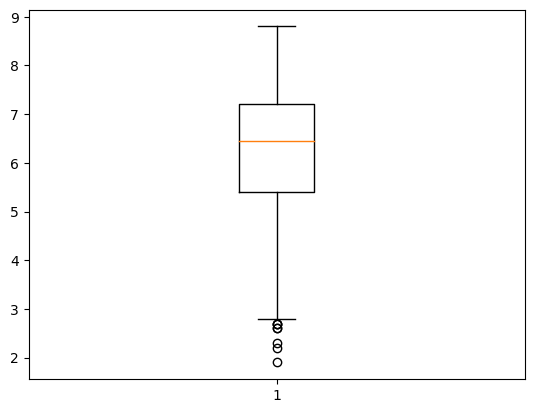

In [29]:
plt.boxplot(movie.imdb_score)

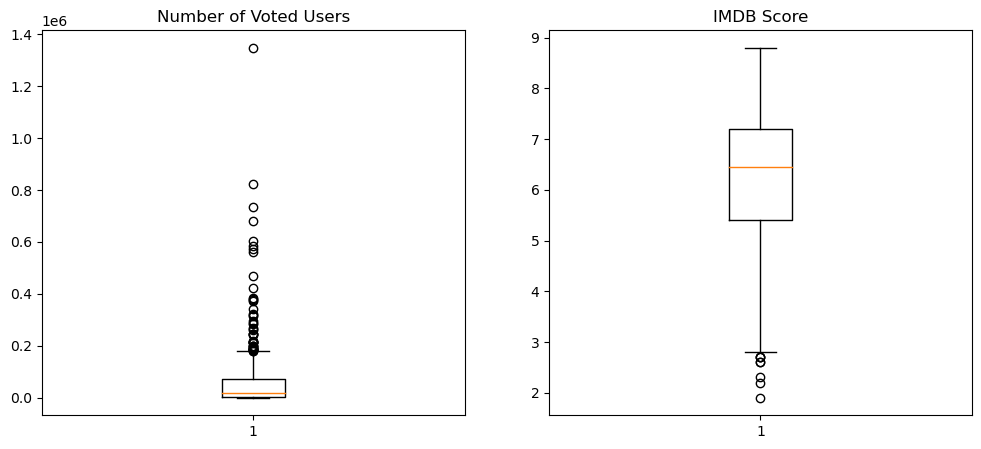

In [30]:
fg, ax = plt.subplots(ncols = 2, figsize=(12,5))

ax[0].boxplot(movie.num_voted_users)
ax[0].set_title('Number of Voted Users')
ax[1].boxplot(movie.imdb_score)
ax[1].set_title('IMDB Score');

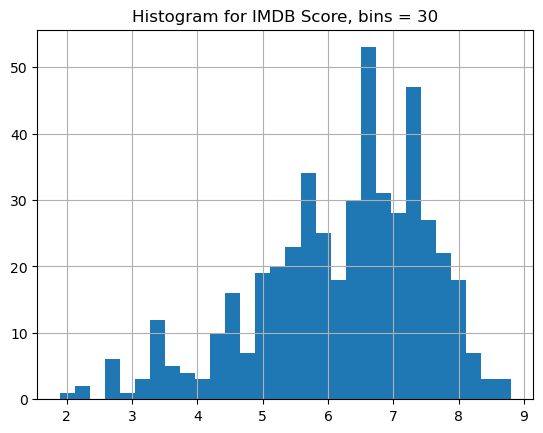

In [31]:
movie.loc[  :  , 'imdb_score'].hist(bins=30)
plt.title('Histogram for IMDB Score, bins = 30' )
plt.show()

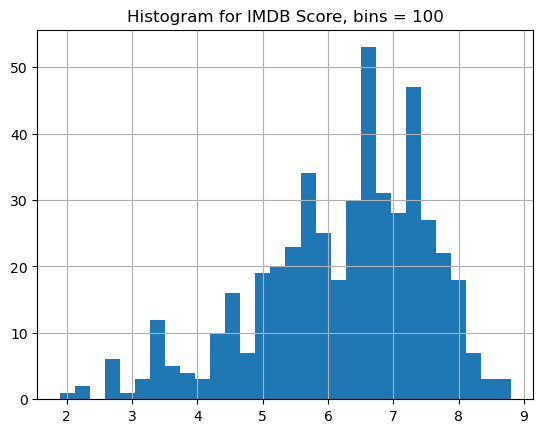

In [32]:
movie.loc[  :  , 'imdb_score'].hist(bins=30)
plt.title('Histogram for IMDB Score, bins = 100' )
plt.show()

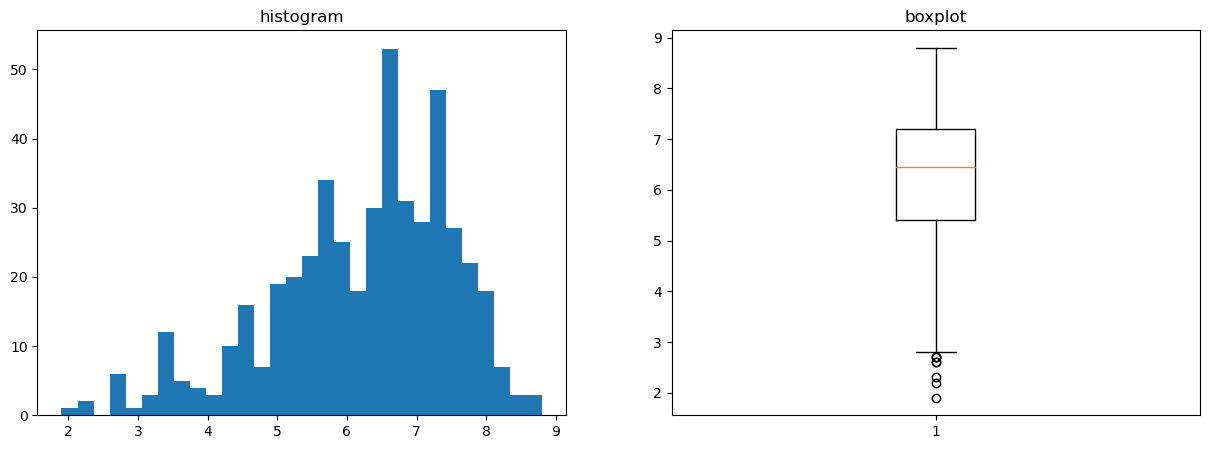

In [33]:
fg, ax = plt.subplots(ncols = 2, figsize=(15,5))

ax[0].hist(movie['imdb_score'],bins=30)
ax[0].set_title('histogram')

ax[1].boxplot(movie['imdb_score'])
ax[1].set_title('boxplot');

# Relationships

### C+C

In [34]:
movie_tab = pd.crosstab(movie.loc[:, "content_rating"],
                        movie.loc[:, "genres"])

movie_tab

genres,Action,Adventure,Animation,Comedy,Documentary,Drama,Family,Fantasy,Horror,Musical,Romance,Sci-Fi,Thriller,Western
content_rating,,,,,,,,,,,,,,
G,0,0,0,0,4,0,0,0,0,0,0,0,0,0
NC-17,0,0,0,0,0,2,0,0,0,0,0,0,0,0
PG,0,0,2,16,9,18,3,1,1,1,0,1,0,1
PG-13,3,1,0,59,1,53,0,0,4,0,1,0,0,2
R,7,2,0,107,3,113,0,0,48,0,0,0,10,5


In [35]:
(pd.crosstab(movie.loc[:, "content_rating"],
            movie.loc[:, "genres"],
            normalize = "index") * 100).round(2)

genres,Action,Adventure,Animation,Comedy,Documentary,Drama,Family,Fantasy,Horror,Musical,Romance,Sci-Fi,Thriller,Western
content_rating,,,,,,,,,,,,,,
G,0.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
NC-17,0.00,0.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
PG,0.00,0.00,3.77,30.19,16.98,33.96,5.66,1.89,1.89,1.89,0.00,1.89,0.00,1.89
PG-13,2.42,0.81,0.00,47.58,0.81,42.74,0.00,0.00,3.23,0.00,0.81,0.00,0.00,1.61
R,2.37,0.68,0.00,36.27,1.02,38.31,0.00,0.00,16.27,0.00,0.00,0.00,3.39,1.69


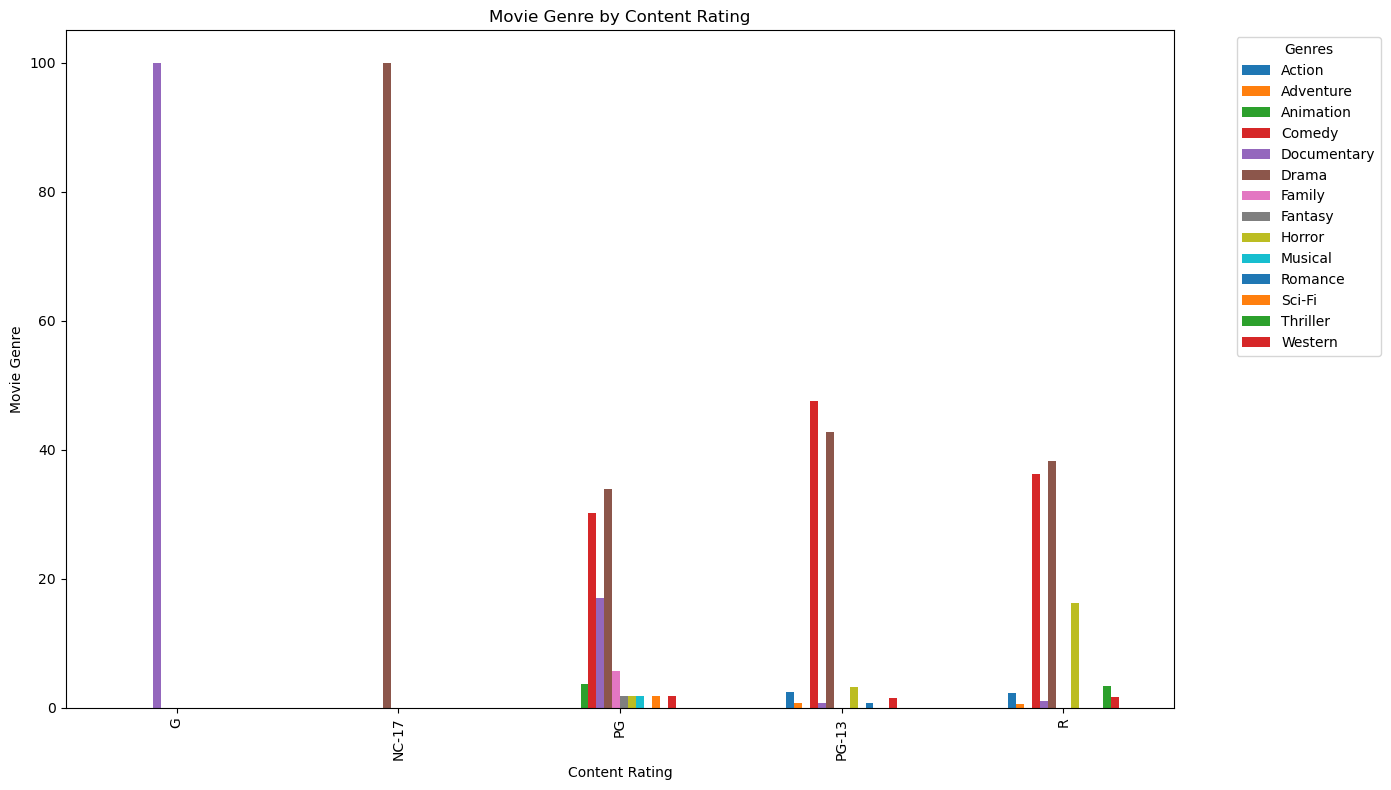

In [36]:
(pd.crosstab(movie.loc[:, "content_rating"],
            movie.loc[:, "genres"],
            normalize = "index") * 100).round(2).plot.bar(
    figsize=(14, 8), 
    title="Movie Genre by Content Rating"
)

# Adding labels
plt.xlabel("Content Rating")
plt.ylabel("Movie Genre")

# Adjusting legend position
plt.legend(title="Genres", bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()

### C+N

Text(0, 0.5, 'IMDb Score')

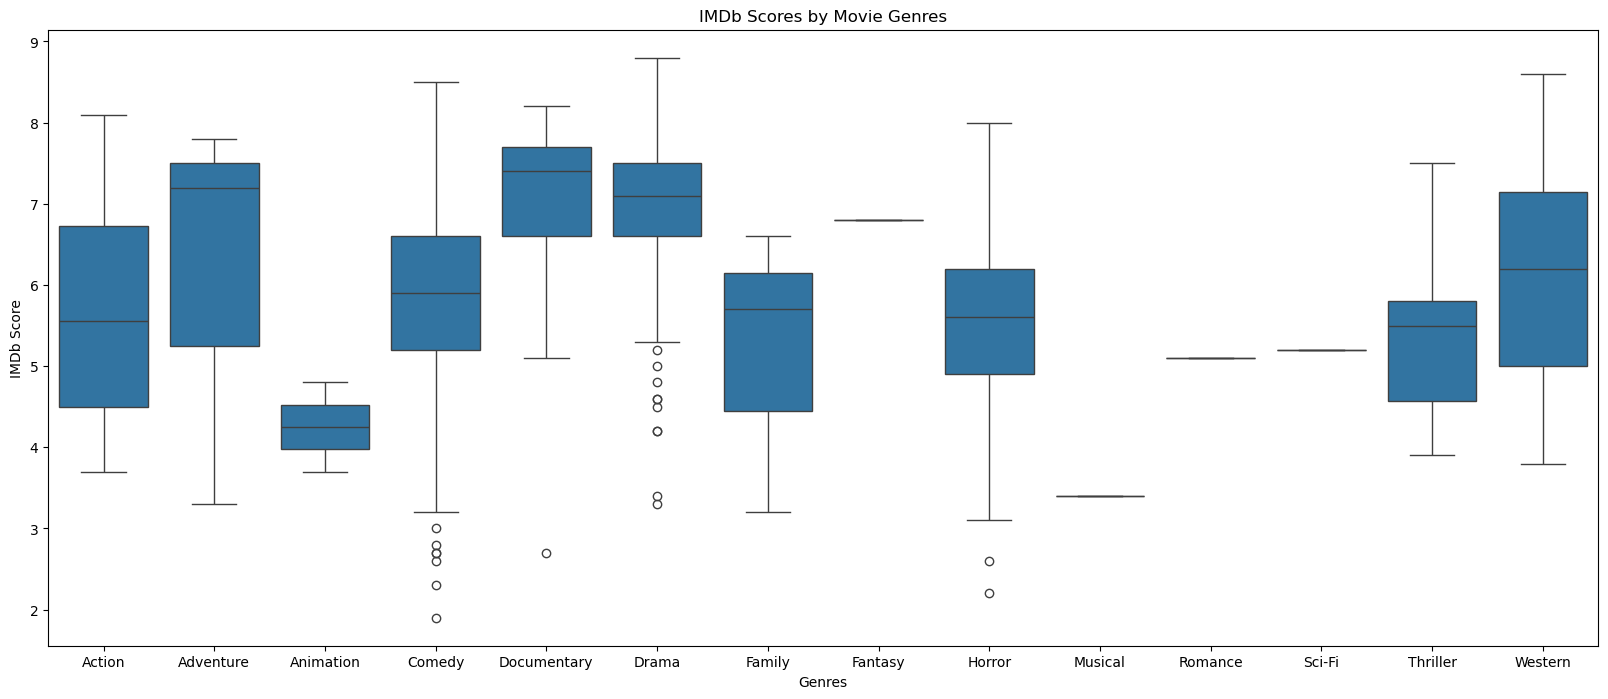

In [37]:
plt.figure(figsize=(20, 8))
sns.boxplot(x='genres', y='imdb_score', data=movie)
plt.title('IMDb Scores by Movie Genres')
plt.xlabel('Genres')
plt.ylabel('IMDb Score')

### N+N

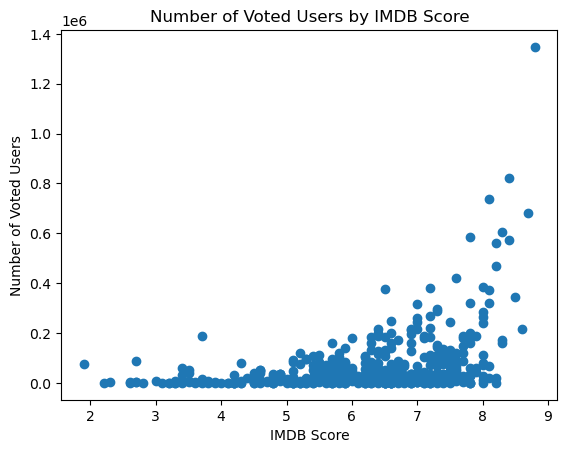

In [38]:
plt.scatter(x = "imdb_score", y = "num_voted_users", data = movie)
plt.title('Number of Voted Users by IMDB Score')
plt.xlabel('IMDB Score')
plt.ylabel('Number of Voted Users');

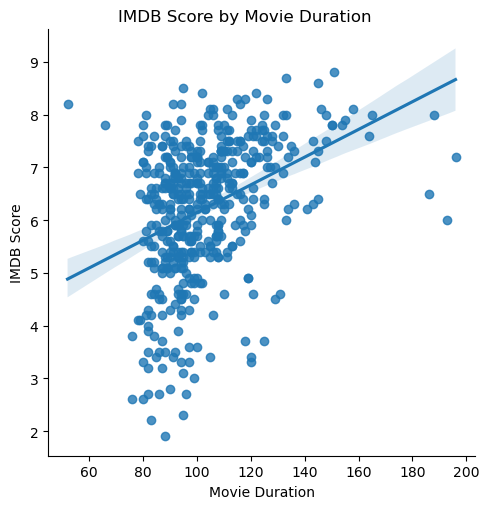

In [39]:
sns.lmplot(x = "duration", y  = "imdb_score", data = movie,
           ci = 95).fig.suptitle("IMDB Score by Movie Duration", y=1.01)
plt.xlabel('Movie Duration')
plt.ylabel('IMDB Score');
plt.show()

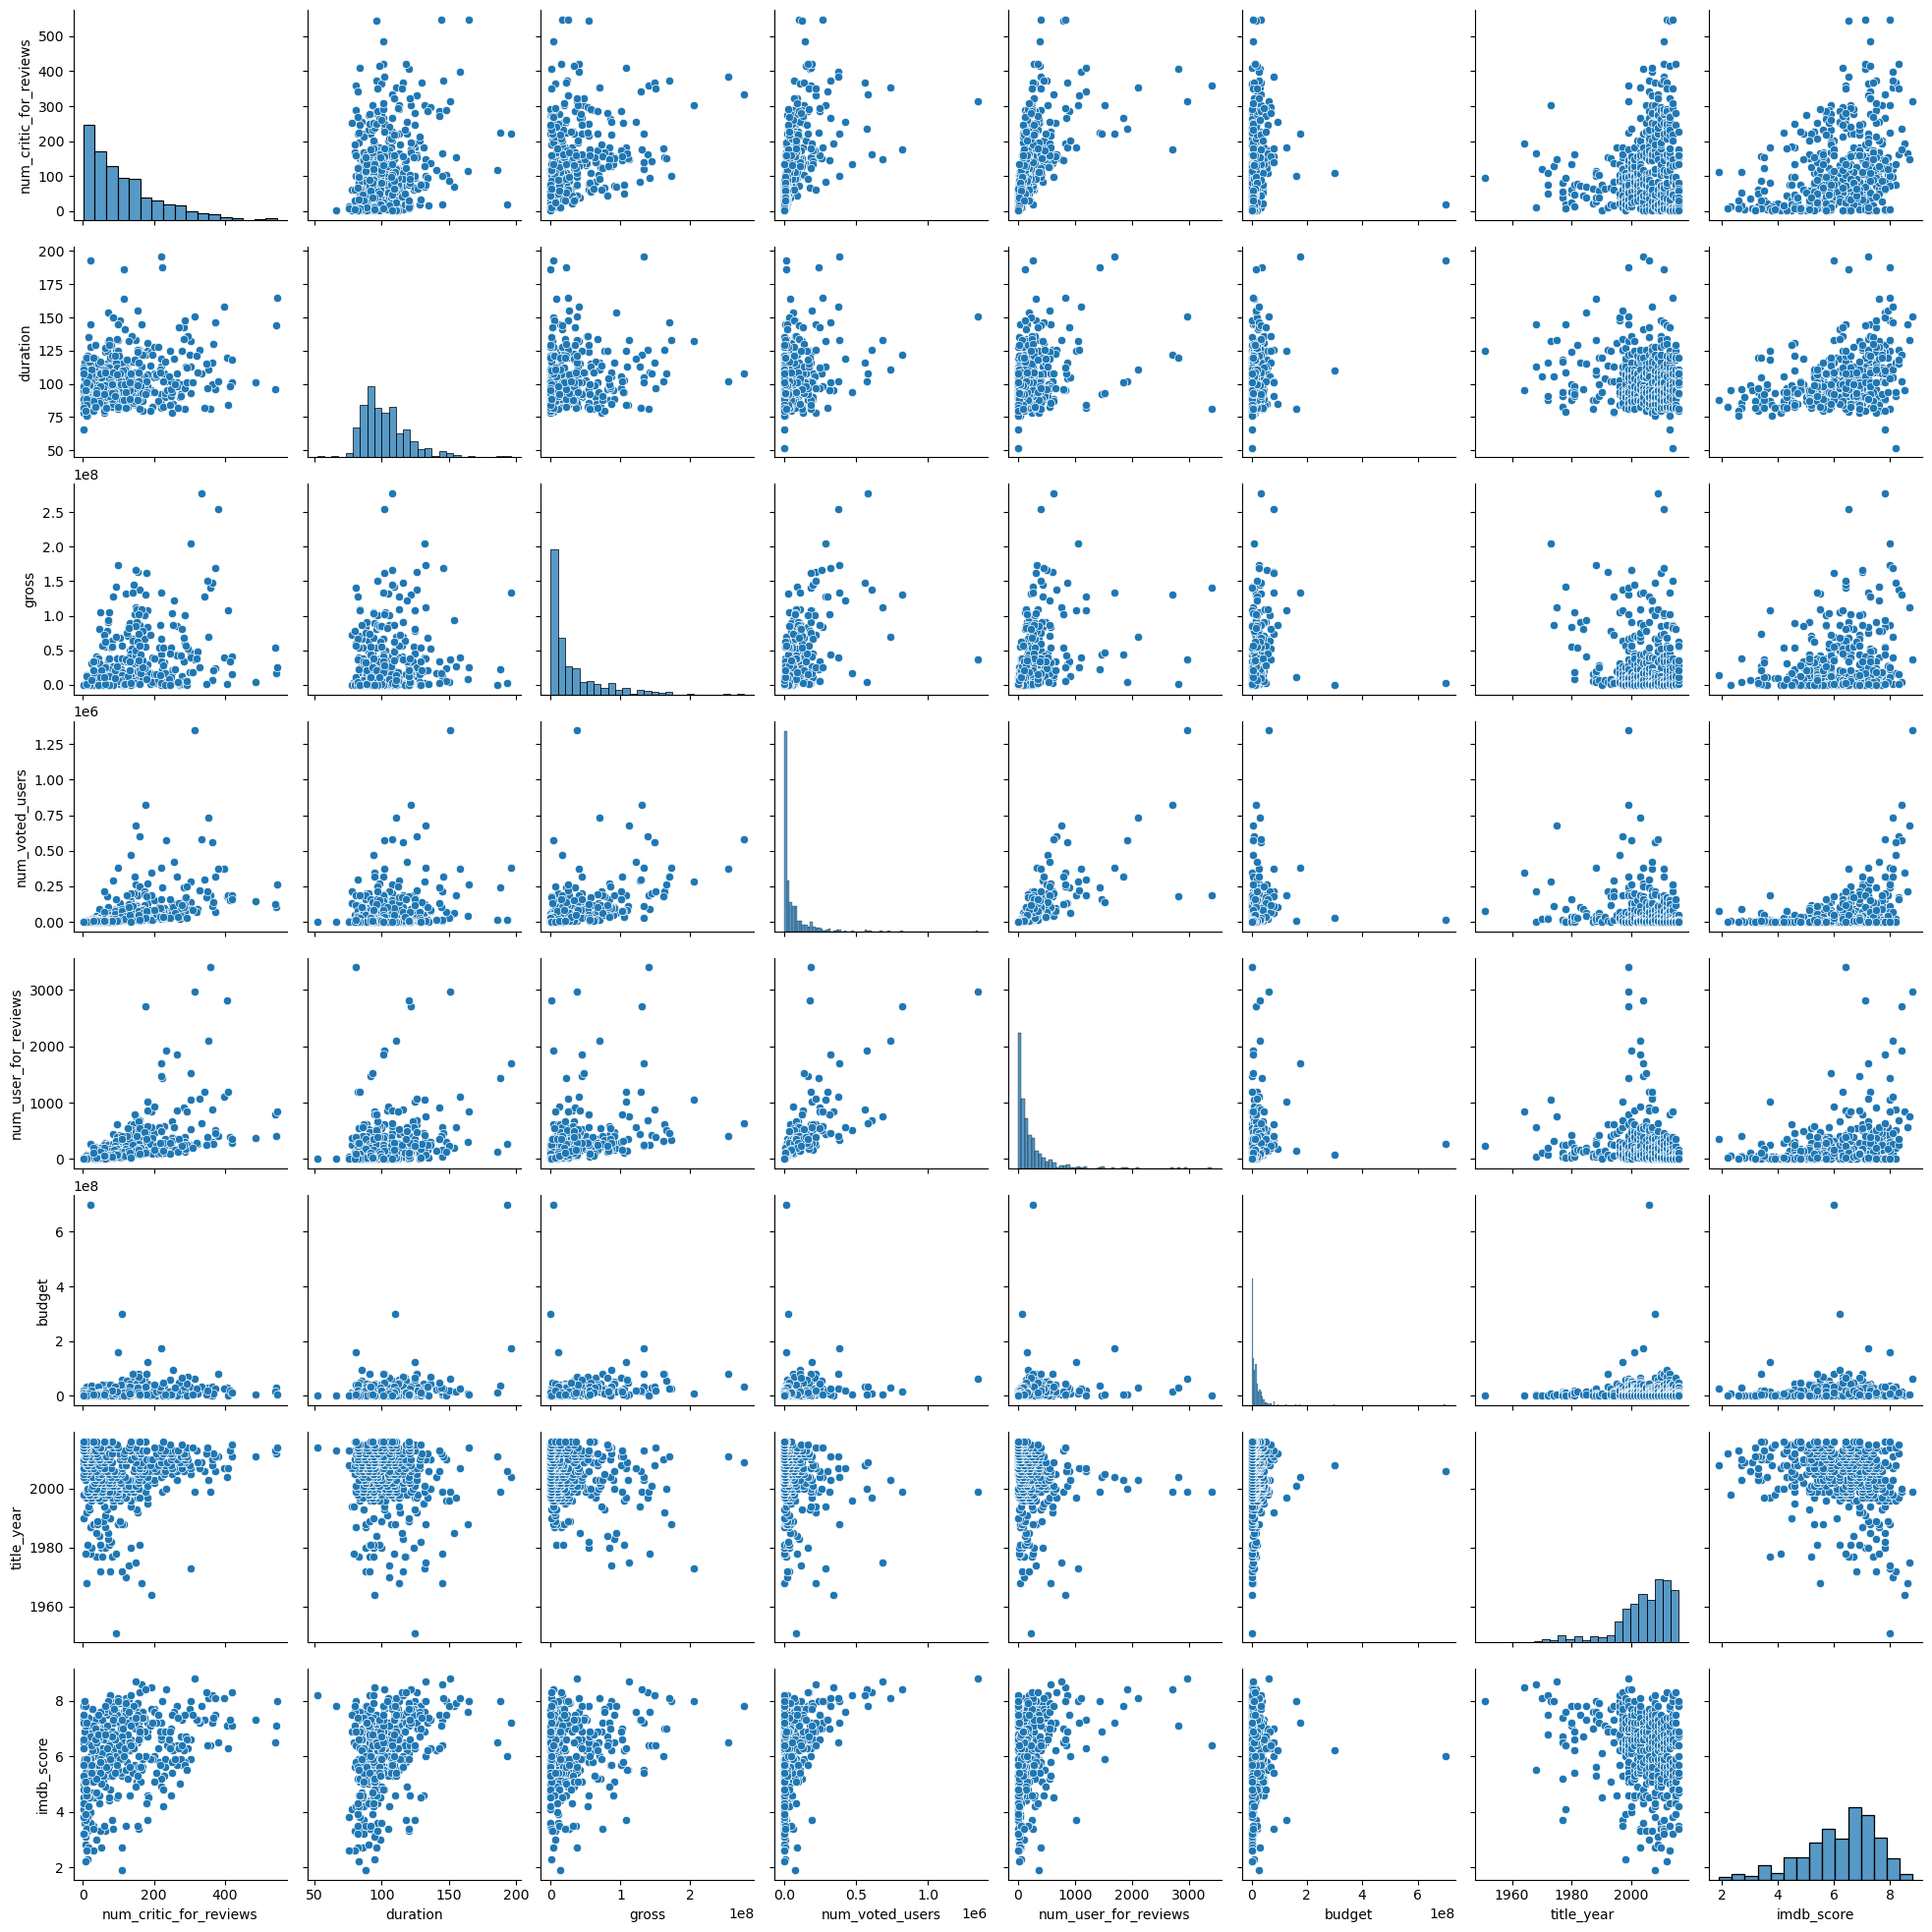

In [40]:
sns.pairplot(movie)

In [41]:
movie.corr()

C:\Users\zqhai\AppData\Local\Temp\ipykernel_3608\188837703.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  movie.corr()


,num_critic_for_reviews,duration,gross,num_voted_users,num_user_for_reviews,budget,title_year,imdb_score
num_critic_for_reviews,1.000000,0.251361,0.364034,0.518855,0.558651,0.104091,0.166156,0.323242
duration,0.251361,1.000000,0.115532,0.287813,0.254756,0.326473,-0.122059,0.370052
gross,0.364034,0.115532,1.000000,0.546609,0.374223,0.159346,-0.140649,0.131945
num_voted_users,0.518855,0.287813,0.546609,1.000000,0.751100,0.117651,-0.117230,0.372177
num_user_for_reviews,0.558651,0.254756,0.374223,0.751100,1.000000,0.110611,-0.120606,0.277418
budget,0.104091,0.326473,0.159346,0.117651,0.110611,1.000000,0.059231,-0.004828
title_year,0.166156,-0.122059,-0.140649,-0.117230,-0.120606,0.059231,1.000000,-0.278256
imdb_score,0.323242,0.370052,0.131945,0.372177,0.277418,-0.004828,-0.278256,1.000000


C:\Users\zqhai\AppData\Local\Temp\ipykernel_3608\304288108.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = movie.corr()


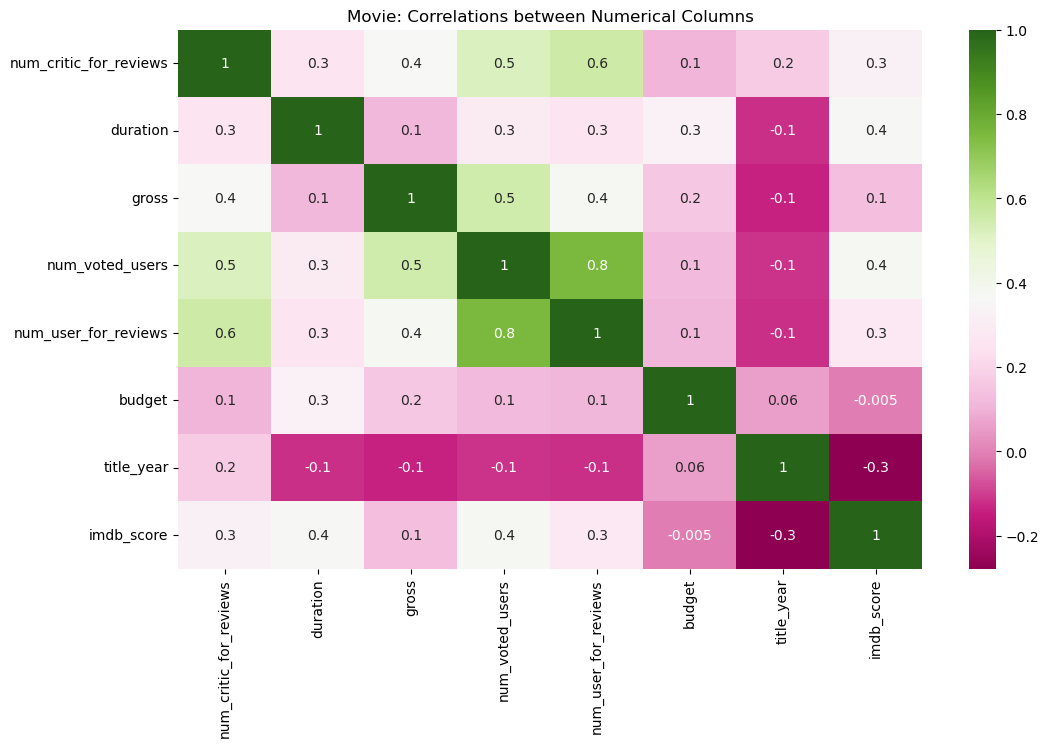

In [42]:
# Heat Map of Correlations
corr_matrix = movie.corr()
plt.figure(figsize=(12,7))
sns.heatmap(corr_matrix, cmap='PiYG', annot=True, square=False, fmt='.1g')
plt.title('Movie: Correlations between Numerical Columns');